In [1]:
library(tidyverse)
library(glue)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [2]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/combosciplex/logfoldchanges"

In [3]:
unique_vals <- c('Panobinostat+Crizotinib','Panobinostat+Curcumin','Panobinostat+SRT1720','Panobinostat+Sorafenib','SRT2104+Alvespimycin','control+Alvespimycin','control+Dacinostat'
                )

In [4]:
data_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/analysis/combosciplex/embedding"

In [5]:
df <- read_csv(file.path(data_dir, "aggregated_pearson.csv")) 

New names:
• `` -> `...1`
Rows: 106 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ...1
dbl (5): linear, poly, rbf, sigmoid, CellFlow

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
df <- df %>% select(c(linear, CellFlow)) 

In [8]:
long_data <- pivot_longer(df, cols = c("linear", "CellFlow"))

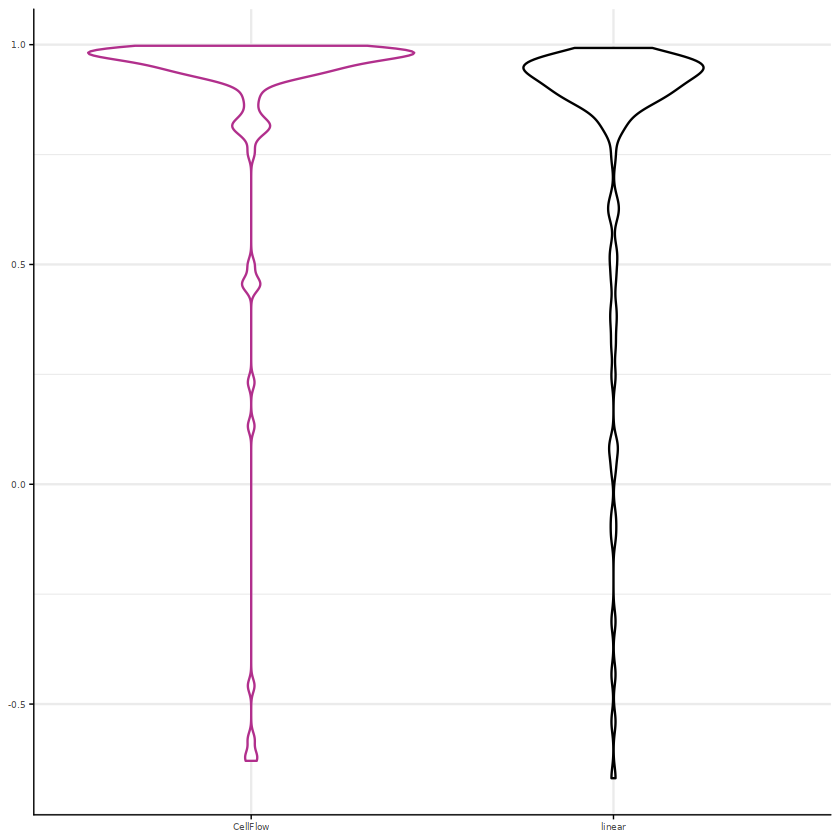

In [13]:
p <- ggplot(long_data, aes(x = name, y = value, color = name)) +
  geom_violin(alpha = 1.0) + 
  scale_color_manual(values = c("CellFlow" = "#B12F8C", "linear"="black")) +
  article_text() +
no_legend() +
theme(
    #panel.grid.major=element_blank(), 
    #panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)

print(p)


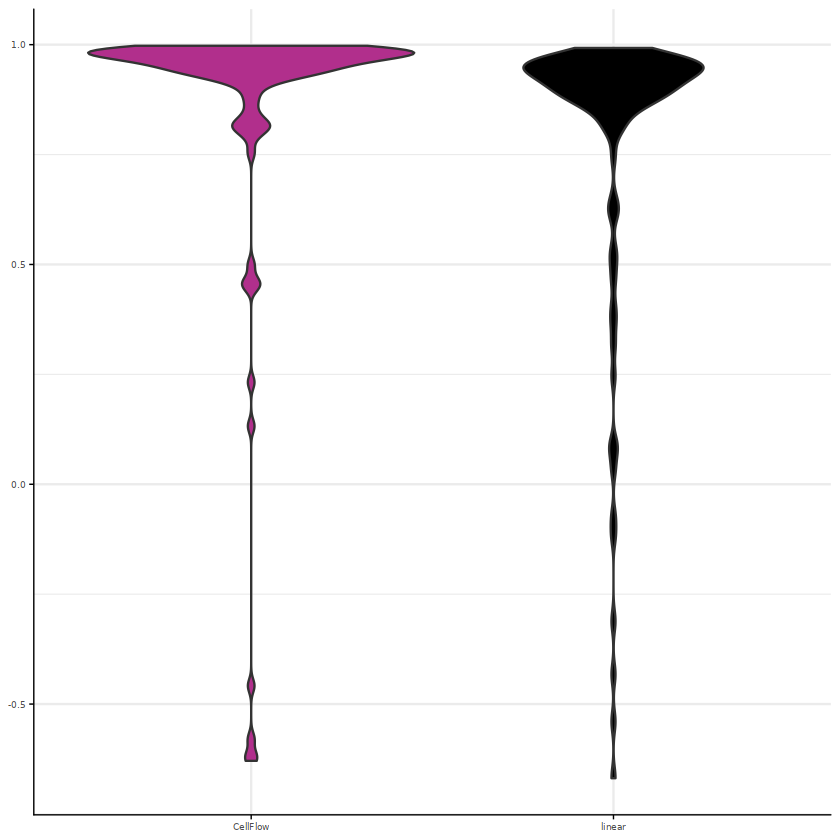

In [21]:
p <- ggplot(long_data, aes(x = name, y = value, fill = name)) +
  geom_violin(alpha = 1.0) +  # Black outline for violins
  scale_fill_manual(values = c("CellFlow" = "#B12F8C", "linear"="black")) +
article_text() +
no_legend() +
theme(
    #panel.grid.major=element_blank(), 
    #panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)

print(p)


In [23]:
ggsave(file.path(output_dir, "correlations_aggregated.pdf"), plot = p, device = "pdf", width = 4, height = 3.0, unit="cm")  # Adjust height to accommodate the annotation
